# Import Libraries


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, accuracy_score, roc_auc_score,
                             roc_curve, confusion_matrix, precision_score,
                             recall_score, f1_score, log_loss, balanced_accuracy_score)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


#Load Dataset

In [20]:

X_train = pd.read_csv("/content/X_Train_Data_Input.csv")
X_test = pd.read_csv("/content/X_Test_Data_Input.csv")
Y_train = pd.read_csv("/content/Y_Train_Data_Target.csv")
Y_test = pd.read_csv("/content/Y_Test_Data_Target.csv")

# Display the first few rows of the datasets for verification
print("X_train sample:")
print(X_train.head())
print("\nY_train sample:")
print(Y_train.head())


X_train sample:
                                 ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4  f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column12  Column13  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0         0   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0         0   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1         1   
3       NaN       NaN -0.407939 -0.015607 -0.774979  ...         0         0   
4 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0         0   

   Column14  Column15  Column16  Column17  Col

#Data preprocessing


In [21]:

# Drop the ID column from both X_train and X_test as it is not needed for training
X_train_cleaned = X_train.drop(columns=["ID"])
X_test_cleaned = X_test.drop(columns=["ID"])

# Handle missing values using median imputation to fill in any gaps in the dataset
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_cleaned)
X_test_imputed = imputer.transform(X_test_cleaned)

# Standardize the features (scaling) to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


#Model Architecture

In [22]:
# Build a neural network model
model = Sequential([
    Dense(128, input_shape=(X_train_scaled.shape[1],)),  # First hidden layer
    LeakyReLU(alpha=0.1),  # Leaky ReLU activation function
    Dropout(0.3),  # Dropout layer to prevent overfitting

    Dense(64),  # Second hidden layer
    LeakyReLU(alpha=0.1),
    Dropout(0.3),  # Another dropout layer

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


#Model Training

In [23]:
# Define callbacks for early stopping and model checkpointing
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),  # Stop training when validation loss stops improving
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')  # Save the best model
]

# Train the model using the training data and validate using the test data
history = model.fit(
    X_train_scaled,
    Y_train['target'],  # Ensure 'target' is the correct column name
    epochs=25,
    batch_size=32,
    validation_data=(X_test_scaled, Y_test['target']),
    callbacks=callbacks,
    verbose=2  # Verbose output to see training progress
)


Epoch 1/25
24536/24536 - 73s - 3ms/step - accuracy: 0.9711 - loss: 0.0647 - val_accuracy: 0.9743 - val_loss: 0.0593
Epoch 2/25
24536/24536 - 87s - 4ms/step - accuracy: 0.9730 - loss: 0.0604 - val_accuracy: 0.9741 - val_loss: 0.0585
Epoch 3/25
24536/24536 - 68s - 3ms/step - accuracy: 0.9736 - loss: 0.0598 - val_accuracy: 0.9746 - val_loss: 0.0587
Epoch 4/25
24536/24536 - 54s - 2ms/step - accuracy: 0.9738 - loss: 0.0595 - val_accuracy: 0.9751 - val_loss: 0.0569
Epoch 5/25
24536/24536 - 100s - 4ms/step - accuracy: 0.9740 - loss: 0.0589 - val_accuracy: 0.9745 - val_loss: 0.0570
Epoch 6/25
24536/24536 - 52s - 2ms/step - accuracy: 0.9741 - loss: 0.0593 - val_accuracy: 0.9742 - val_loss: 0.0576
Epoch 7/25
24536/24536 - 84s - 3ms/step - accuracy: 0.9741 - loss: 0.0594 - val_accuracy: 0.9752 - val_loss: 0.0571
Epoch 8/25
24536/24536 - 54s - 2ms/step - accuracy: 0.9742 - loss: 0.0590 - val_accuracy: 0.9751 - val_loss: 0.0568
Epoch 9/25
24536/24536 - 83s - 3ms/step - accuracy: 0.9742 - loss: 0.05

#Predictions

In [24]:
# Make predictions on the test set
Y_pred_proba = model.predict(X_test_scaled).flatten()  # Get predicted probabilities
Y_pred = (Y_pred_proba > 0.6).astype(int)  # Convert probabilities to binary predictions with threshold 0.6


8179/8179 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step


#Model Evaluation

In [25]:
# Evaluate predictions with a detailed classification report
print(classification_report(Y_test['target'], Y_pred))

# Calculate various evaluation metrics
metrics = {
    'Accuracy': accuracy_score(Y_test['target'], Y_pred),
    'AUC-ROC': roc_auc_score(Y_test['target'], Y_pred_proba),
    'Precision': precision_score(Y_test['target'], Y_pred),
    'Recall': recall_score(Y_test['target'], Y_pred),
    'F1 Score': f1_score(Y_test['target'], Y_pred),
    'Balanced Accuracy': balanced_accuracy_score(Y_test['target'], Y_pred),
    'Log Loss': log_loss(Y_test['target'], Y_pred_proba)
}

# Display calculated metrics
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.84      0.91      0.87     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.94      0.93    261712
weighted avg       0.98      0.98      0.98    261712

Accuracy: 0.9753
AUC-ROC: 0.9933
Precision: 0.8437
Recall: 0.9062
F1 Score: 0.8738
Balanced Accuracy: 0.9443
Log Loss: 0.0559


##Confusion Matrix

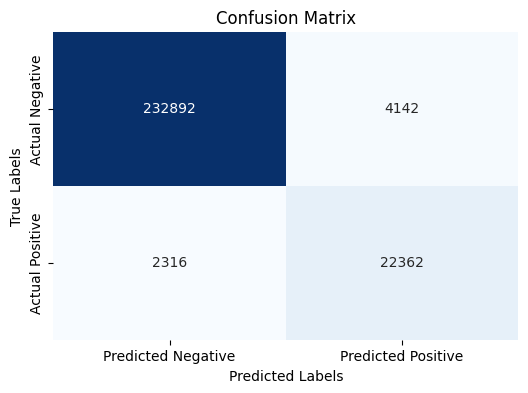

In [26]:
# Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(Y_test['target'], Y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


##ROC Curve

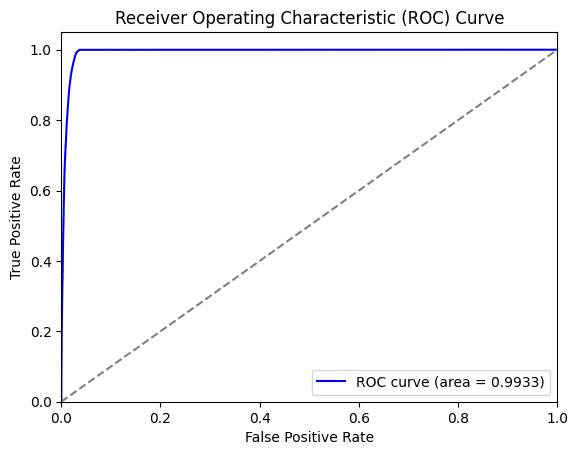

In [27]:
# Plot the ROC curve to visualize the trade-off between true positive rate and false positive rate
fpr, tpr, _ = roc_curve(Y_test['target'], Y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_score(Y_test["target"], Y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [28]:
# Display predicted targets for the unseen data
print("Predicted targets for the unseen data:")
print(Y_pred)


Predicted targets for the unseen data:
[0 0 0 ... 0 0 0]


In [30]:
# After training your model
model.save('my_model.keras')  # Save in native Keras format

# Later in your code (or a new session)
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_model.keras')

# Now you can use loaded_model for predictions or further training



/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
